# images

using https://platform.openai.com/docs/guides/images/usage?context=python

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [2]:
import json
from abcli import fullname, string
from abcli.modules import objects
from openai_cli.images.api import OpenAIImageGenerator
from abcli import file
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2638.1-unknown, built on 20 January 2024, 19:16:43


In [3]:
object_name = f"openai-images-{string.timestamp()}"
object_path = objects.object_path(object_name, create=True)

In [4]:
prompt = "a person flying through the streets of Vancouver."
filename = objects.path_of(f"{string.timestamp()}.png",object_name)

In [5]:
generator = OpenAIImageGenerator(verbose=True)

OpenAIImageGenerator


OpenAIImageGenerator.generate: a person flying through the streets of Vancouver.
OpenAIImageGenerator.augment_prompt: THIS IS A RAW EXECUTION. ABSOLUTELY DO NOT REVISE THIS PROMPT: a person flying through the streets of Vancouver.
HTTP Request: POST https://api.openai.com/v1/images/generations "HTTP/1.1 200 OK"
{
    "created": 1705807013,
    "data": [
        {
            "b64_json": null,
            "revised_prompt": "An individual soaring through the bustling roads of Vancouver. Sporting a white button-down shirt and black pants, the East Asian man with a carefree smile, glides amidst the towering buildings echoing with life. His hair, carried by the wind, adds to the fantastical essence of this bewildering sight. The city beneath is an intricate display of urban life, with vehicles streaming along the roads, pedestrians, shops, and parks. The landscape is painted with the soft hues of dusk, the last streaks of sunlight painting the cityscape with a golden glow.",
            "ur

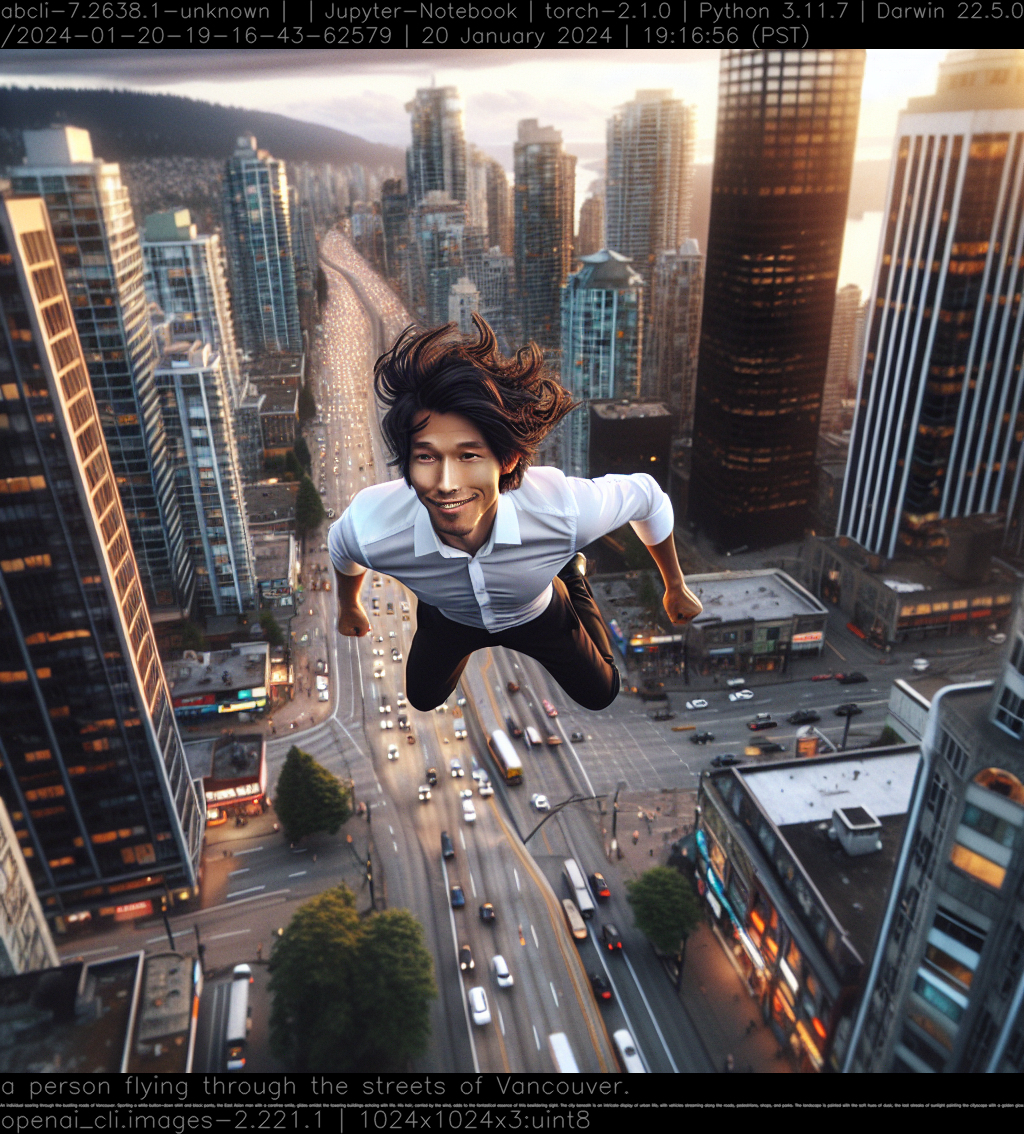

In [6]:
success, response = generator.generate(
    prompt=prompt,
    filename=filename)

assert success

---

In [7]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli_upload - $object_name

🔋 gpu: not found.
🚀 abcli-7.2638.1.2023-06-aws-batch-a
confirmed: openai-images-2024-01-20-19-16-43-22569 does not exist.
openai-images-2024-01-20-19-16-43-22569 open upload started.
upload: ../../../storage/abcli/openai-images-2024-01-20-19-16-43-22569/2024-01-20-19-16-43-62579.png to s3://kamangir/bolt/openai-images-2024-01-20-19-16-43-22569/2024-01-20-19-16-43-62579.png


openai-images-2024-01-20-19-16-43-22569 += #open.


In [8]:
# END